In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/archive (2).zip')

# Inspect the data
print(data.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [4]:
# Assuming the last column is the target and all other columns are features
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (the last column)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# One-vs-Rest Classification
ovr_model = OneVsRestClassifier(LogisticRegression())
ovr_model.fit(X_train, y_train)
ovr_predictions = ovr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [7]:
# Evaluate One-vs-Rest model
print("One-vs-Rest Classification")
ovr_accuracy = accuracy_score(y_test, ovr_predictions)
print(f'Accuracy: {ovr_accuracy * 100:.2f}%')

One-vs-Rest Classification
Accuracy: 64.07%


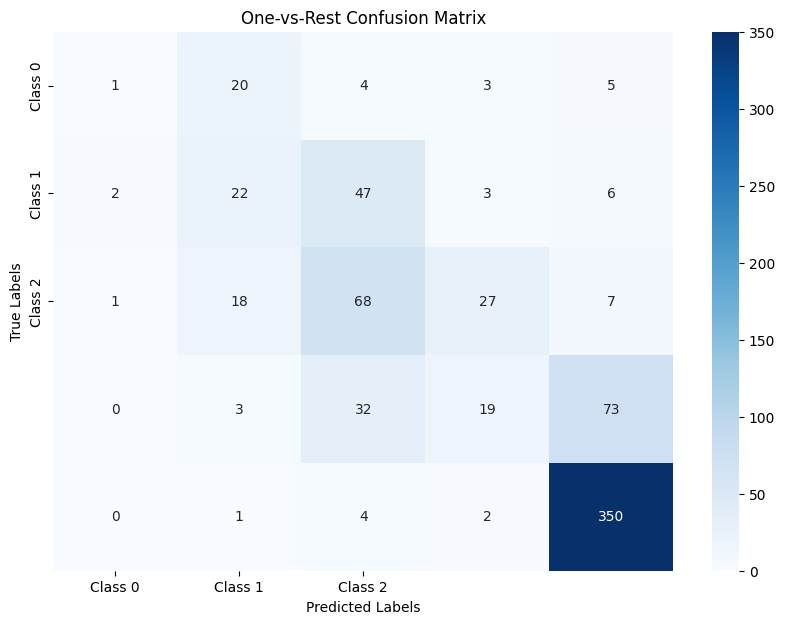

In [8]:
# Confusion Matrix for One-vs-Rest
ovr_cm = confusion_matrix(y_test, ovr_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(ovr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('One-vs-Rest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

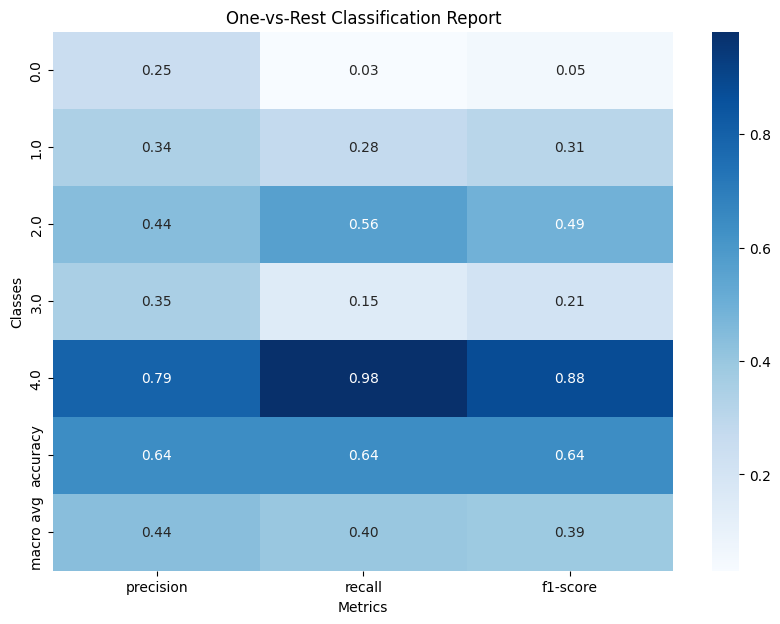

In [9]:
# Classification Report for One-vs-Rest
ovr_cr = classification_report(y_test, ovr_predictions, output_dict=True)
df_ovr_cr = pd.DataFrame(ovr_cr).transpose()
plt.figure(figsize=(10, 7))
sns.heatmap(df_ovr_cr.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('One-vs-Rest Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

In [10]:
# One-vs-One Classification
ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(X_train, y_train)
ovo_predictions = ovo_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [11]:
# Evaluate One-vs-One model
print("\nOne-vs-One Classification")
ovo_accuracy = accuracy_score(y_test, ovo_predictions)
print(f'Accuracy: {ovo_accuracy * 100:.2f}%')


One-vs-One Classification
Accuracy: 71.59%


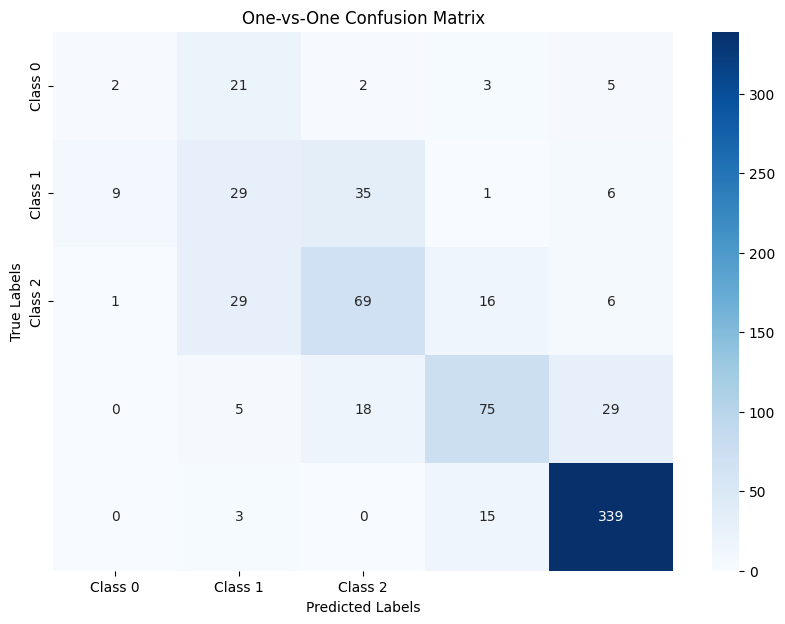

In [12]:
# Confusion Matrix for One-vs-One
ovo_cm = confusion_matrix(y_test, ovo_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(ovo_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('One-vs-One Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

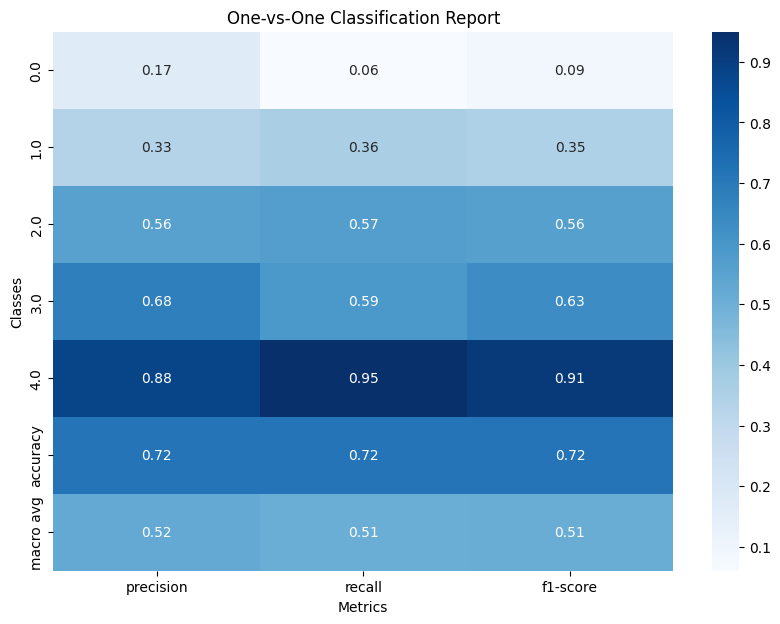

In [13]:
# Classification Report for One-vs-One
ovo_cr = classification_report(y_test, ovo_predictions, output_dict=True)
df_ovo_cr = pd.DataFrame(ovo_cr).transpose()
plt.figure(figsize=(10, 7))
sns.heatmap(df_ovo_cr.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title('One-vs-One Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()